In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/statistica spaziale2/'

In [ ]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import dill
dill.load_session(filepath+'topic_analysis2.pkl')

In [ ]:
import dill 
dill.load_session(filepath+'topic_analysis3.pkl')

##Dataset di score

In [ ]:
!pip install lyricsgenius

In [ ]:
import lyricsgenius
from lyricsgenius import Genius 
genius = lyricsgenius.Genius('Zh07AjXtPEnomJBh_eGUx8aZF3PggbBAws366Qxxchsa-OsUXis6QPkelUX0C17W')
genius.verbose = False
genius.remove_section_headers = True

If I ever feel better Phoenix

In [ ]:
phoenix = genius.search_artist("phoenix", max_songs=81,  sort="title")
if_i = phoenix.song("If I Ever Feel Better")
print(if_i)

"If I Ever Feel Better" by Phoenix:
    If I Ever Feel Better Lyrics
    They say an end can be a start
    Feels like I've been buried yet I'm stil...


In [ ]:
if_i=str(if_i).lower().replace('[^\w\s\d]', ' ')
if_i=if_i.replace('\n    ', ' ')
if_i=if_i[if_i.find('lyrics')+7:]
print(if_i)

they say an end can be a start feels like i've been buried yet i'm stil...


Wonderwall Oasis

In [ ]:
oasis = genius.search_artist("Oasis",  sort="title")
wonderwall=oasis.song('Wonderwall')
print(wonderwall)

"Wonderwall" by Oasis:
    Wonderwall Lyrics
    Today is gonna be the day that they're gonna throw it back to you
    By now, you shou...


In [ ]:
wonderwall=str(wonderwall).lower().replace('[^\w\s\d]', ' ')
wonderwall=wonderwall.replace('\n    ', ' ')
wonderwall=wonderwall[wonderwall.find('lyrics')+7:]
print(wonderwall)

today is gonna be the day that they're gonna throw it back to you by now, you shou...


You really got me The Kinks

In [ ]:
the_kinks=genius.search_artist("The Kinks",  sort="title")
you_really=the_kinks.song('You really got me')
print(you_really)

"You Really Got Me" by The Kinks:
    You Really Got Me Lyrics
    Girl, you really got me goin'
    You got me so I don't know what I'm doin'
    Yea...


In [ ]:
you_really=str(you_really).lower().replace('[^\w\s\d]', ' ')
you_really=you_really.replace('\n    ', ' ')
you_really=you_really[you_really.find('lyrics')+7:]
print(you_really)

girl, you really got me goin' you got me so i don't know what i'm doin' yea...


Coastline Hollow Coves

In [ ]:
hollow_coves=genius.search_artist("Hollow Coves",  sort="title")
coastline=hollow_coves.song('Coastline')
print(coastline)

"Coastline" by Hollow Coves:
    Coastline Lyrics
    I'm leaving home for the Coastline
    Some place under the sun
    I feel my heart for the...


In [ ]:
coastline=str(coastline).lower().replace('[^\w\s\d]', ' ')
coastline=coastline.replace('\n    ', ' ')
coastline=coastline[coastline.find('lyrics')+7:]
print(coastline)

i'm leaving home for the coastline some place under the sun i feel my heart for the...


Dataset

In [ ]:
diz={'titolo':['If I ever feel better', 'Wonderwall', 'You really got me', 'Coastline'], 'artista':['Phoenix', 'Oasis', 'The Kinks', 'Hollow Coves'], 'lyrics':[if_i_ever, wonderwall, you_really, coastline]}
score=pd.DataFrame(diz)
score

,titolo,artista,lyrics
0,If I ever feel better,Phoenix,they say an end can be a start feels like i've...
1,Wonderwall,Oasis,today is gonna be the day that they're gonna t...
2,You really got me,The Kinks,"girl, you really got me goin' you got me so i ..."
3,Coastline,Hollow Coves,i'm leaving home for the coastline some place ...


##Pulizia testi

In [ ]:
raw_score=score['lyrics']

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lemmatization

In [ ]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
lemmatizer_s = WordNetLemmatizer()

text_score = raw_score.str.lower().str.replace('[^\w\s\d]',' ', regex=True) # \d tiene anche i caratteri numerici
text_score = text_score.str.split()
%time text_score = text_score.apply(lambda x: [lemmatizer_s.lemmatize(sent) for sent in x])
for row in text_score:
    [row.remove(i) for i in row if len(i) < 2]
text_score.head()

CPU times: user 4.62 s, sys: 174 ms, total: 4.79 s
Wall time: 4.76 s


0    [they, say, an, end, can, be, start, feel, lik...
1    [today, is, gonna, be, the, day, that, they, r...
2    [girl, you, really, got, me, goin, you, got, m...
3    [m, leaving, home, for, the, coastline, some, ...
Name: lyrics, dtype: object

Bigrams and N-grams

In [ ]:
from gensim.models.phrases import Phrases
from nltk.corpus import stopwords
connectors_s = stopwords.words('english')

# bigram = Phrases(text, min_count=5, threshold=0.2, connector_words=connectors) #gensim 4
%time bigram_s = Phrases(text_score, min_count=5, threshold=0.2, common_terms=connectors_s) #gensim 3
%time bigrams_s = [bigram_s[item] for item in text_score]

# ngram = Phrases(bigrams, min_count=5, threshold=0.2, connector_words=connectors) # gensim 4
%time ngram_s = Phrases(bigrams_s, min_count=5, threshold=0.2, common_terms=connectors_s) # gensim 3
%time ngrams_s = [ngram_s[item] for item in bigrams_s]

CPU times: user 935 µs, sys: 0 ns, total: 935 µs
Wall time: 937 µs
CPU times: user 2.07 ms, sys: 0 ns, total: 2.07 ms
Wall time: 1.98 ms
CPU times: user 722 µs, sys: 0 ns, total: 722 µs
Wall time: 731 µs
CPU times: user 523 µs, sys: 0 ns, total: 523 µs
Wall time: 512 µs


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Stopwords

In [ ]:
from nltk.corpus import stopwords
stop_s = stopwords.words('english')
stop_s.extend(['mmmmm', 'instrumental_break'])
train_sentences_s = []
for row in ngrams_s:
    train_sentences_s.append([item for item in row if item not in stop_s])
print(train_sentences_s[0]) 

['say', 'end', 'start', 'feel', 'like', 'buried', 'yet', 'stil']


Vettorizzazione dei testi

In [ ]:
train_sentences1_s=[]
for el in train_sentences_s:
    train_sentences1_s.append(' '.join(el))

In [ ]:
x_score=vectorizer.transform(train_sentences1_s)

In [ ]:
Xscore = x_score.toarray()
Xscore = np.array(Xscore)
len(Xscore[0])

1000

Probabilità previste

In [ ]:
pred_score=best_model.predict(Xscore)

In [ ]:
pred_score

array(['sadness', 'life', 'life', 'sadness'], dtype=object)

In [ ]:
prob_score=best_model.predict_proba(Xscore)

In [ ]:
prob_score

array([[0.33      , 0.01      , 0.07769758, 0.07      , 0.08      ,
        0.36230242, 0.07      ],
       [0.49299009, 0.29      , 0.06001537, 0.05      , 0.01      ,
        0.08699454, 0.01      ],
       [0.39      , 0.01148303, 0.01      , 0.36      , 0.01448106,
        0.14224158, 0.07179433],
       [0.18      , 0.15      , 0.07      , 0.08      , 0.02      ,
        0.49      , 0.01      ]])

##Grafici 

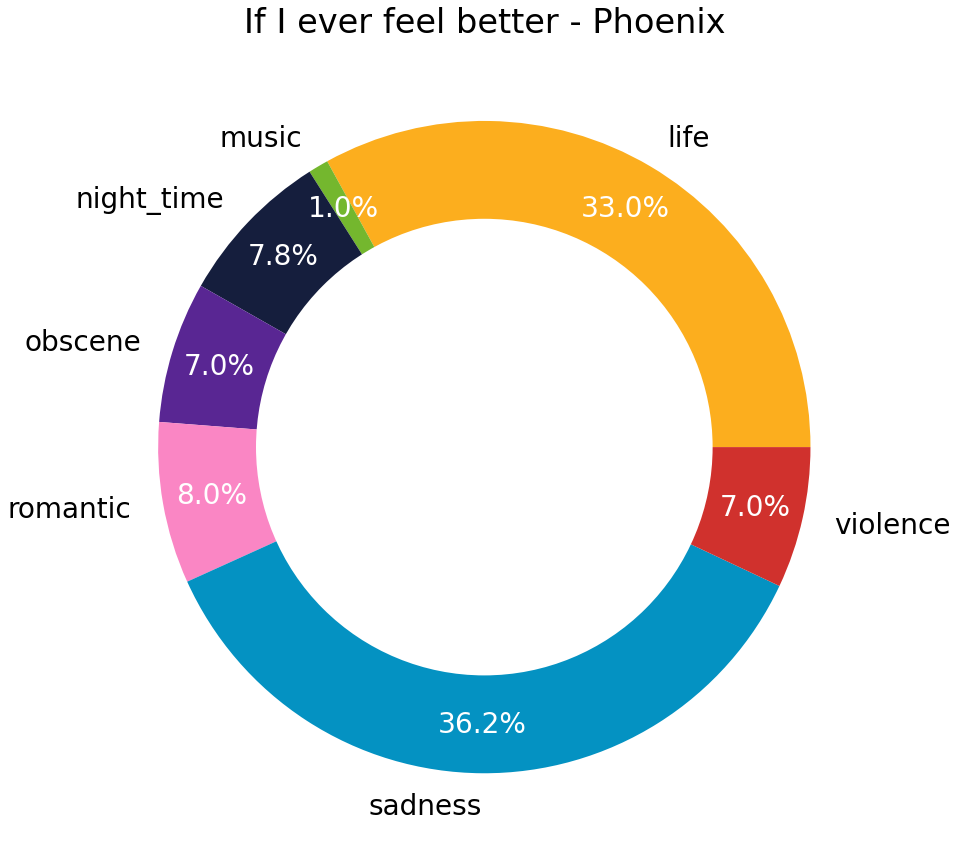

In [ ]:
values=prob_score[0]
plt.figure(figsize=(15,15))
_, _, autotexts=plt.pie(values, colors=colors, labels=fields,
        autopct='%1.1f%%', pctdistance=0.85)
for ins in autotexts:
    ins.set_color('white')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('If I ever feel better - Phoenix')
plt.rcParams.update({'font.size': 28})
# plt.savefig(filepath+'phoenix.png')

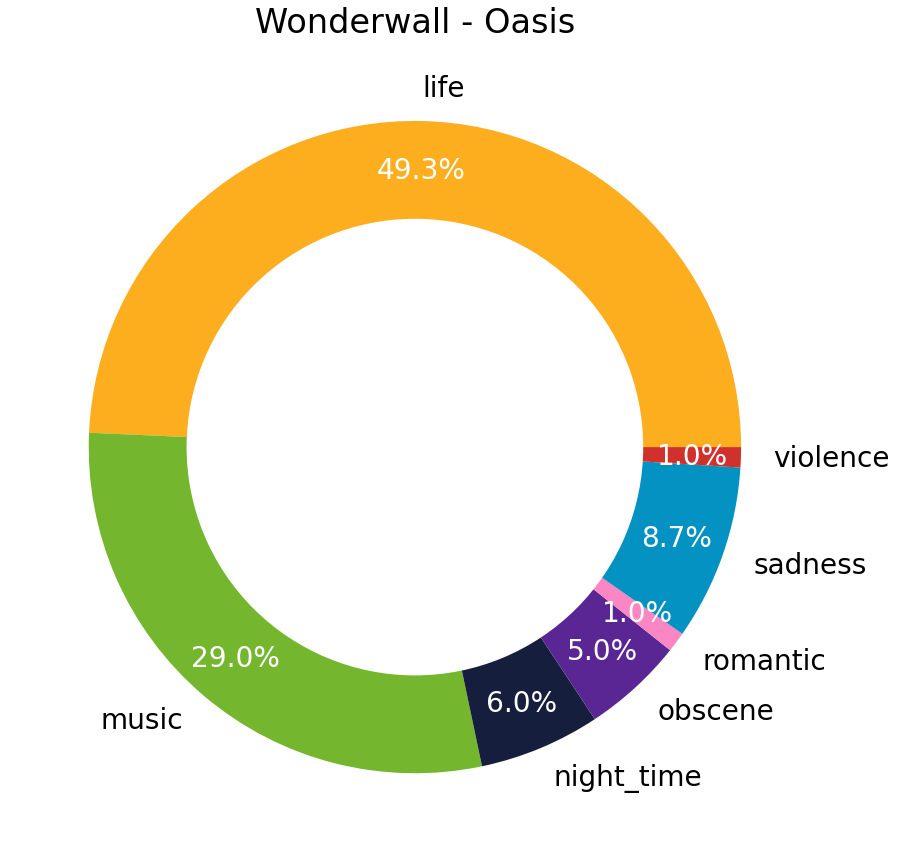

In [ ]:
values=prob_score[1]
plt.figure(figsize=(15,15))
_, _, autotexts=plt.pie(values, colors=colors, labels=fields,
        autopct='%1.1f%%', pctdistance=0.85)
for ins in autotexts:
    ins.set_color('white')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Wonderwall - Oasis')
plt.rcParams.update({'font.size': 28})
# plt.savefig(filepath+'wonderwall.png')

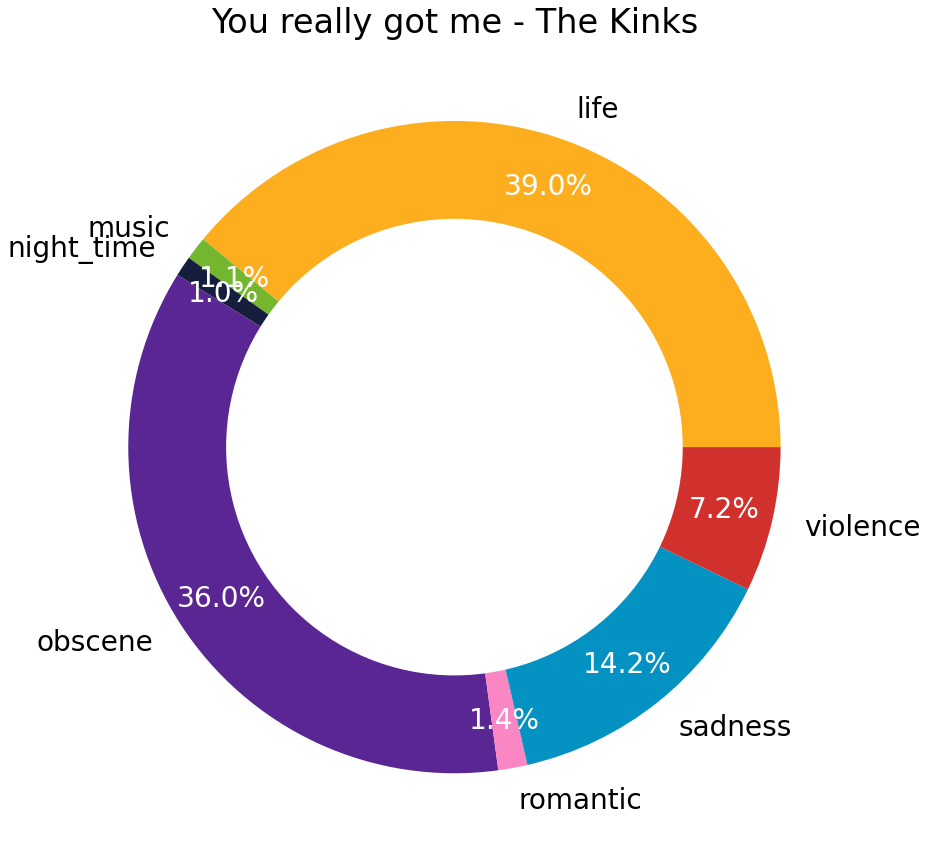

In [ ]:
values=prob_score[2]
plt.figure(figsize=(15,15))
_, _, autotexts=plt.pie(values, colors=colors, labels=fields,
        autopct='%1.1f%%', pctdistance=0.85)
for ins in autotexts:
    ins.set_color('white')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('You really got me - The Kinks')
plt.rcParams.update({'font.size': 28})
# plt.savefig(filepath+'kinks.png')

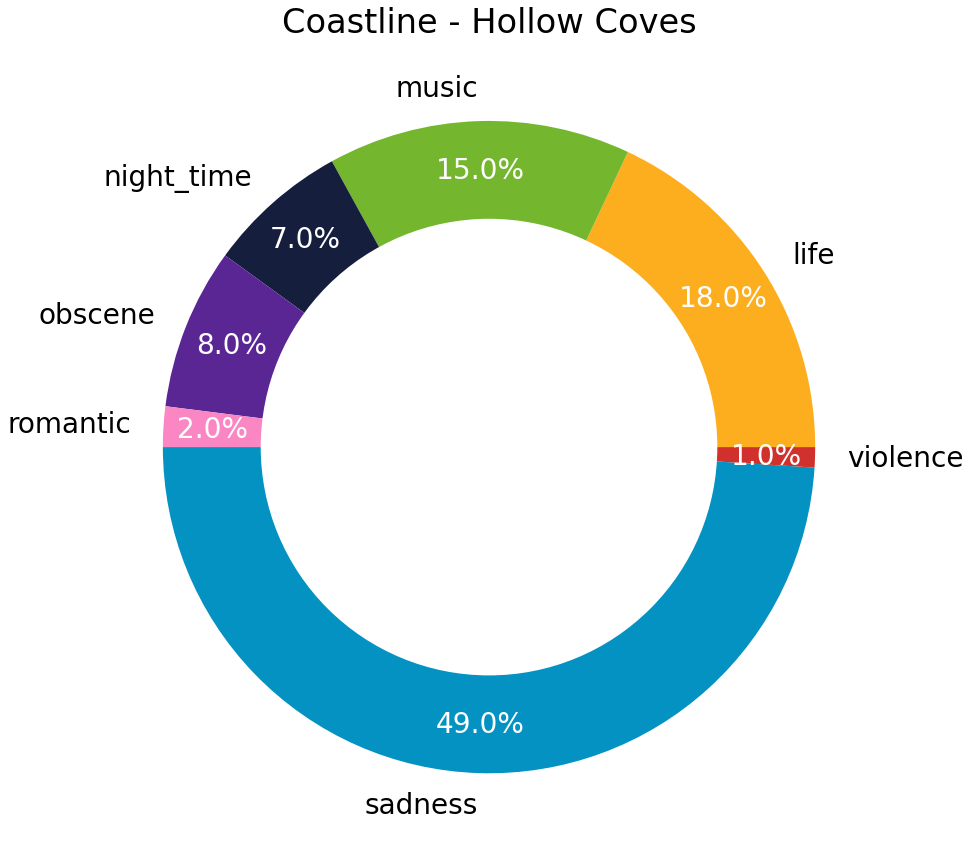

In [ ]:
values=prob_score[3]
plt.figure(figsize=(15,15))
_, _, autotexts=plt.pie(values, colors=colors, labels=fields,
        autopct='%1.1f%%', pctdistance=0.85)
for ins in autotexts:
    ins.set_color('white')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Coastline - Hollow Coves')
plt.rcParams.update({'font.size': 28})
# plt.savefig(filepath+'coastline.png')

##Salvataggio

In [ ]:
import dill 
fileName2='/content/drive/MyDrive/statistica spaziale2/topic_analysis3.pkl'
dill.dump_session(fileName2)